# CENG499 Wine Quality Project
 ## Projcet Team
    Project Team:
    İrfan Doğan BACAKSIZ
    Ebru GÜNDÜZ
    Ali Cem KOÇ
    Nilay Gizem TEZER
    
### Our Data
    https://www.kaggle.com/aleixdorca/wine-quality

In [53]:
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
# linear algebra
import numpy as np
import statistics

# data processing
import pandas as pd
import ast
import csv

# data visualization
import seaborn as sns; sns.set_style('darkgrid')
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.decomposition import PCA,KernelPCA
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


import os
import warnings

import statsmodels.formula.api as sm
import scipy as sc
import scipy.stats as sp
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [52]:
#Loading dataset
wine = pd.read_csv('winequality.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [3]:
#extracting unnecessary columns
del wine['color']
del wine['good']
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [5]:
#describe of the dataset
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


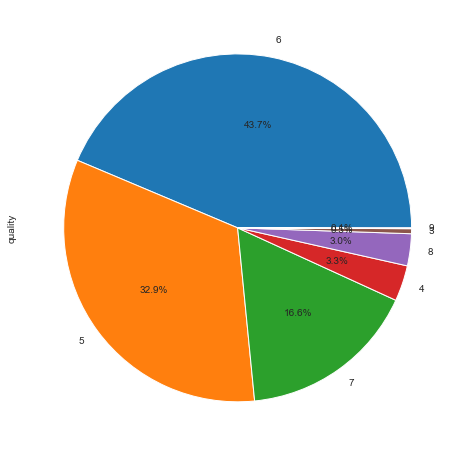

In [6]:
#kalite puanlarını pie grafikle göstrelim
plt.figure(1, figsize=(8,8))
wine['quality'].value_counts().plot.pie(autopct="%1.1f%%")

In [7]:
winecat=wine.copy()
quality = winecat['quality'].values
category = []
for num in quality:
    if num<5:
        category.append("Bad")
    elif num>6:
        category.append("Good")
    else:
        category.append("Mid")

In [8]:
#Create new data
category = pd.DataFrame(data=category, columns=['category'])
winecat = pd.concat([winecat,category],axis=1)
winecat.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Mid
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Mid
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Mid
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Mid
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Mid


Mid     4974
Good    1277
Bad      246
Name: category, dtype: int64

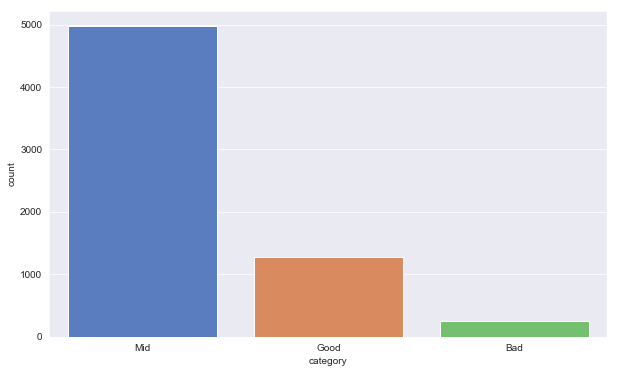

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(winecat["category"],palette="muted")
winecat["category"].value_counts()

[Text(0, 0.5, 'Alcohol'),
 Text(0.5, 0, 'Wine Category'),
 Text(0.5, 1.0, 'Alcohol in different types of Wine Categories')]

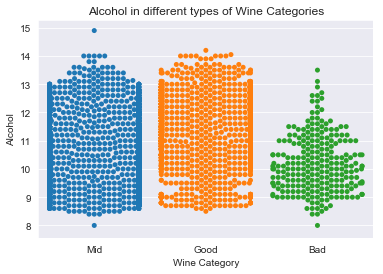

In [10]:
bx = sns.swarmplot(x="category", y="alcohol", data = winecat);
bx.set(xlabel='Wine Category', ylabel='Alcohol', title='Alcohol in different types of Wine Categories')

In [11]:
winecat['grade'] = 1 # good
winecat.grade[winecat.quality < 5]=0
winecat.grade[winecat.quality>6] = 2
winecat.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Mid,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Mid,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Mid,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Mid,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Mid,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Mid,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,Mid,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,Good,2
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,Good,2
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,Mid,1


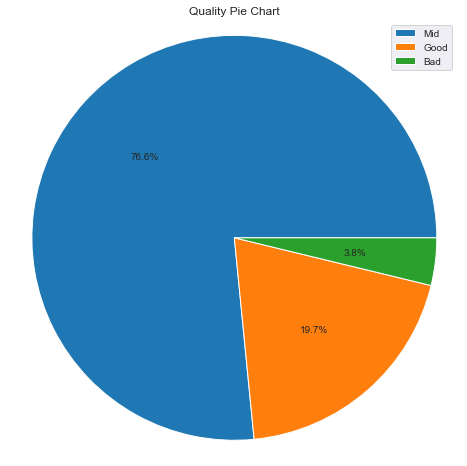

The good quality wines count for  76.6 %.


In [12]:
plt.figure(figsize = (8,8))
labels = winecat.category.value_counts().index
plt.pie(winecat.grade.value_counts(), autopct='%1.1f%%')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.title('Quality Pie Chart')
plt.show()
print('The good quality wines count for ',round(winecat.grade.value_counts(normalize=True)[1]*100,1),'%.')


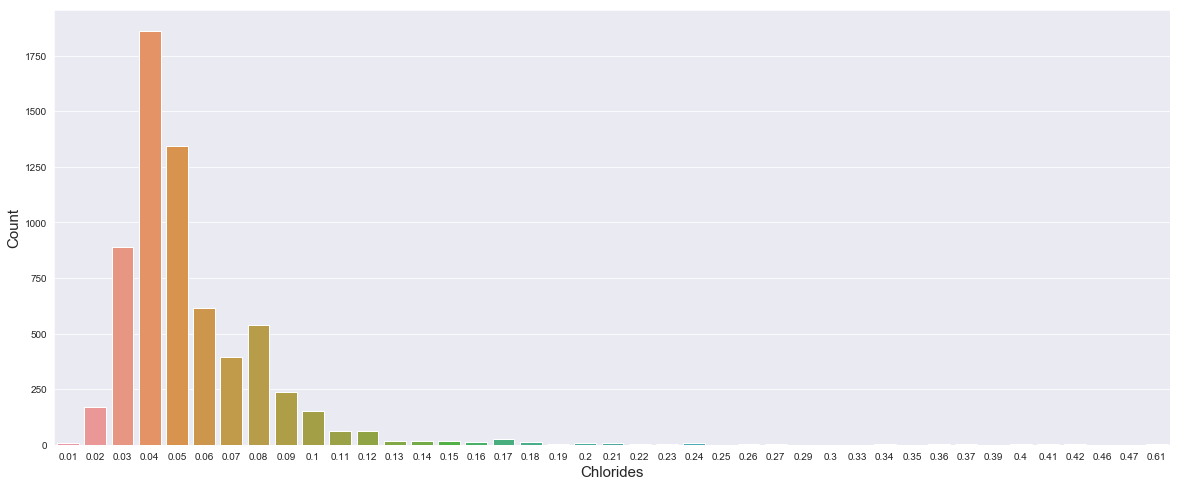

In [13]:
plt.figure(figsize=(20,8))
sns.countplot(x=wine['chlorides'].round(2))
plt.xlabel('Chlorides').set_size(15)
plt.ylabel('Count').set_size(15)

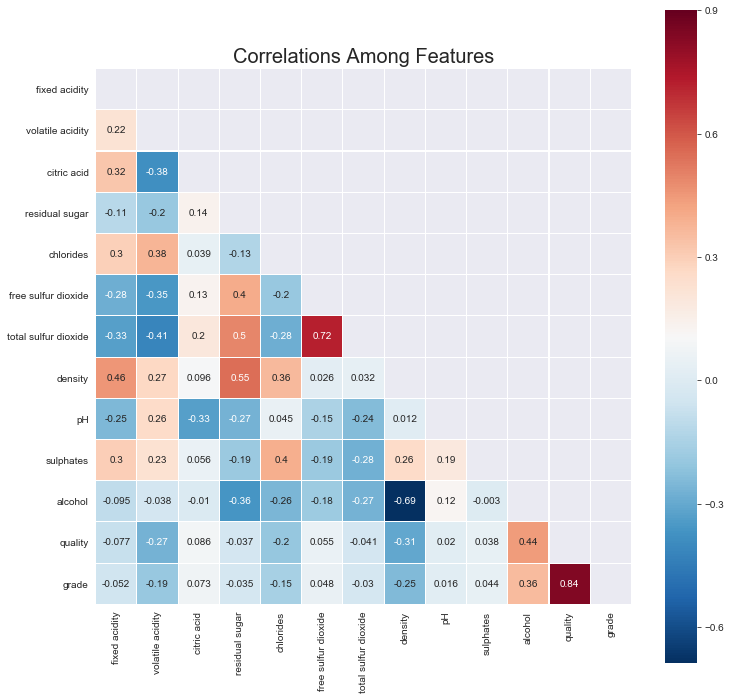

In [14]:
mask = np.zeros_like(winecat.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (12,12))
sns.heatmap(winecat.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

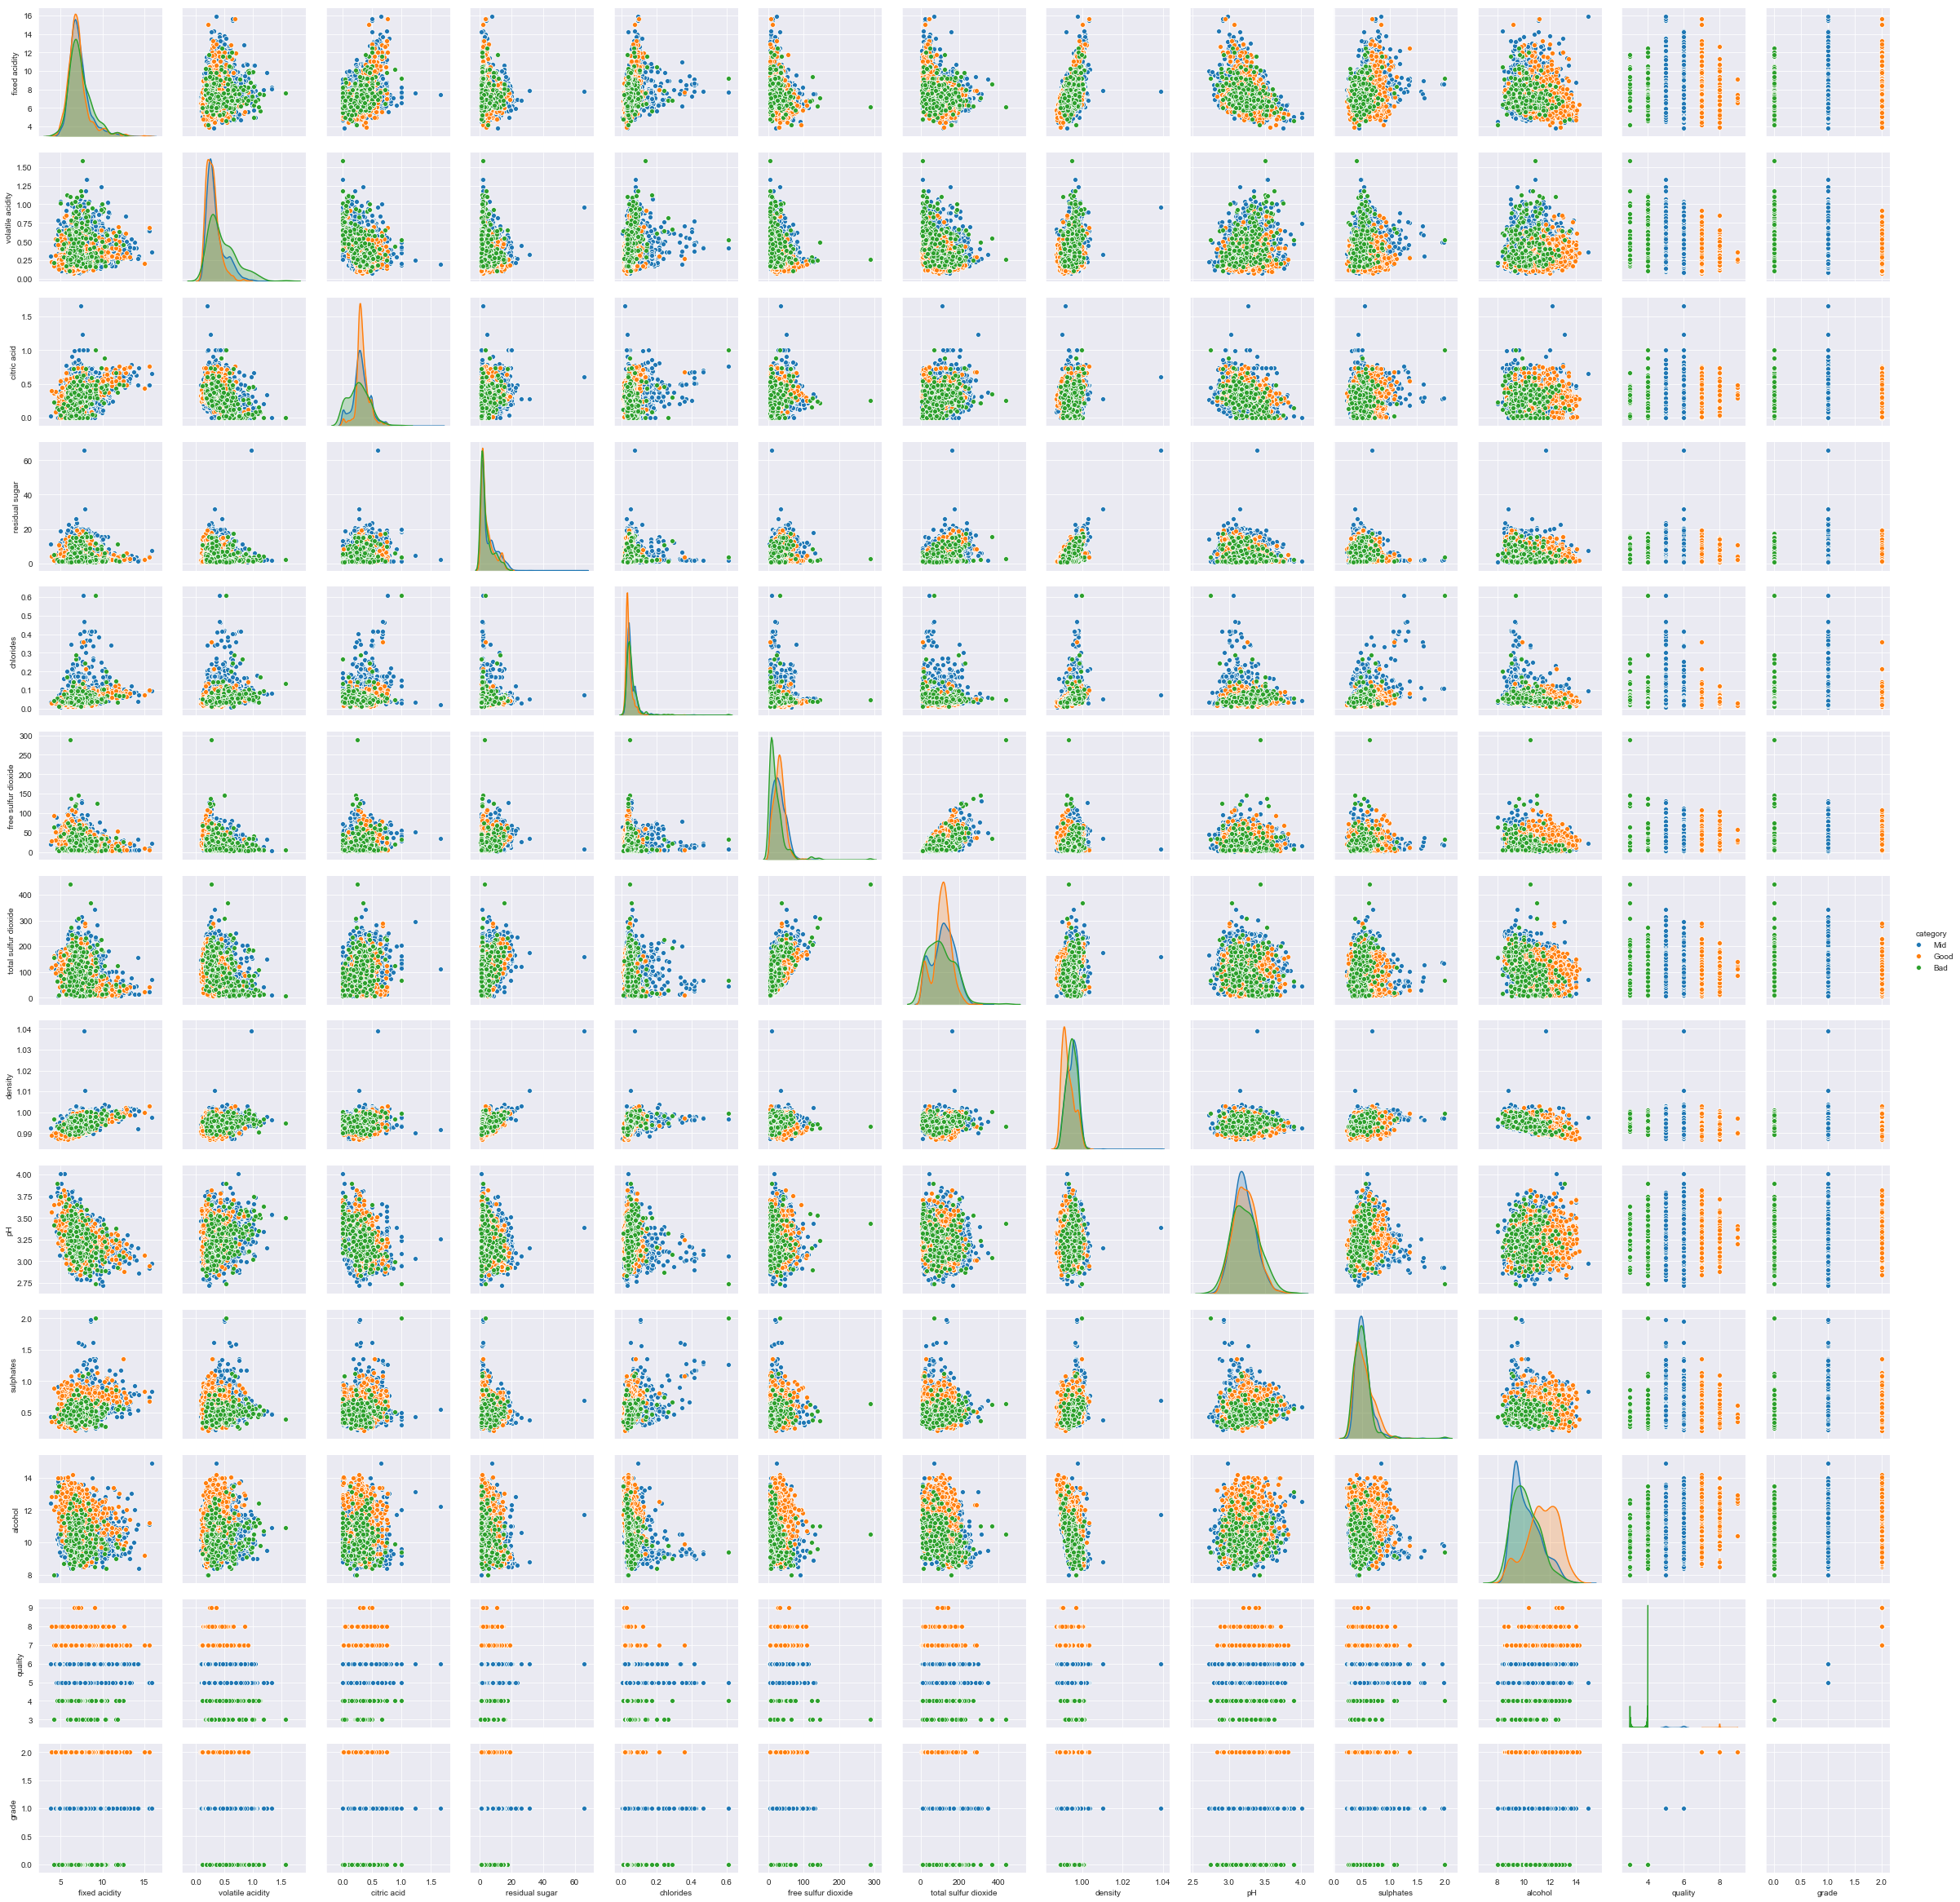

In [15]:
sns.pairplot(winecat, hue='category')
plt.show()

In [16]:
#Özelliklerin kalite puanları ile ilişkisini göstermek için kullanılacak
#çizim türleri
def draw_multivarient_plot(dataset, rows, cols, plot_type):
    """
    dataset: Veri seti
    rows: Satır sayısı
    cols: sütün sayısı
    plot_type: Çizdirilecek grafik türü
    """
    
    #Veri setindeki sütünların isimleri alınıyor
    column_names=dataset.columns.values
    #Kaç tane sütün olduğu bulunuyor
    number_of_column=len(column_names)
    
    #Satır*sütün boyutlarında alt grafik içeren
    #matris oluşturuluyor. Matrisin genişliği:22 yüksekliği:16
    fig, axarr=plt.subplots(rows,cols, figsize=(22,16))

    counter=0# Çizimi yapılacak özelliğin column_names listesindeki indeks değerini tutuyor
    for i in range(rows):
        for j in range(cols):
            """
            i: satır numarasını tutuyor
            j: sütün numarasını tutuyor
            axarr[i][j]: Çizilen grafigin grafik matrisindeki yerini belirliyor
            """
            if 'violin' in plot_type:
                sns.violinplot(x='quality', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                sns.boxplot(x='quality', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'point' in plot_type:
                sns.pointplot(x='quality',y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot(x='quality',y=column_names[counter],data=dataset, ax=axarr[i][j])
                
            counter+=1
            if counter==(number_of_column-1,):
                break

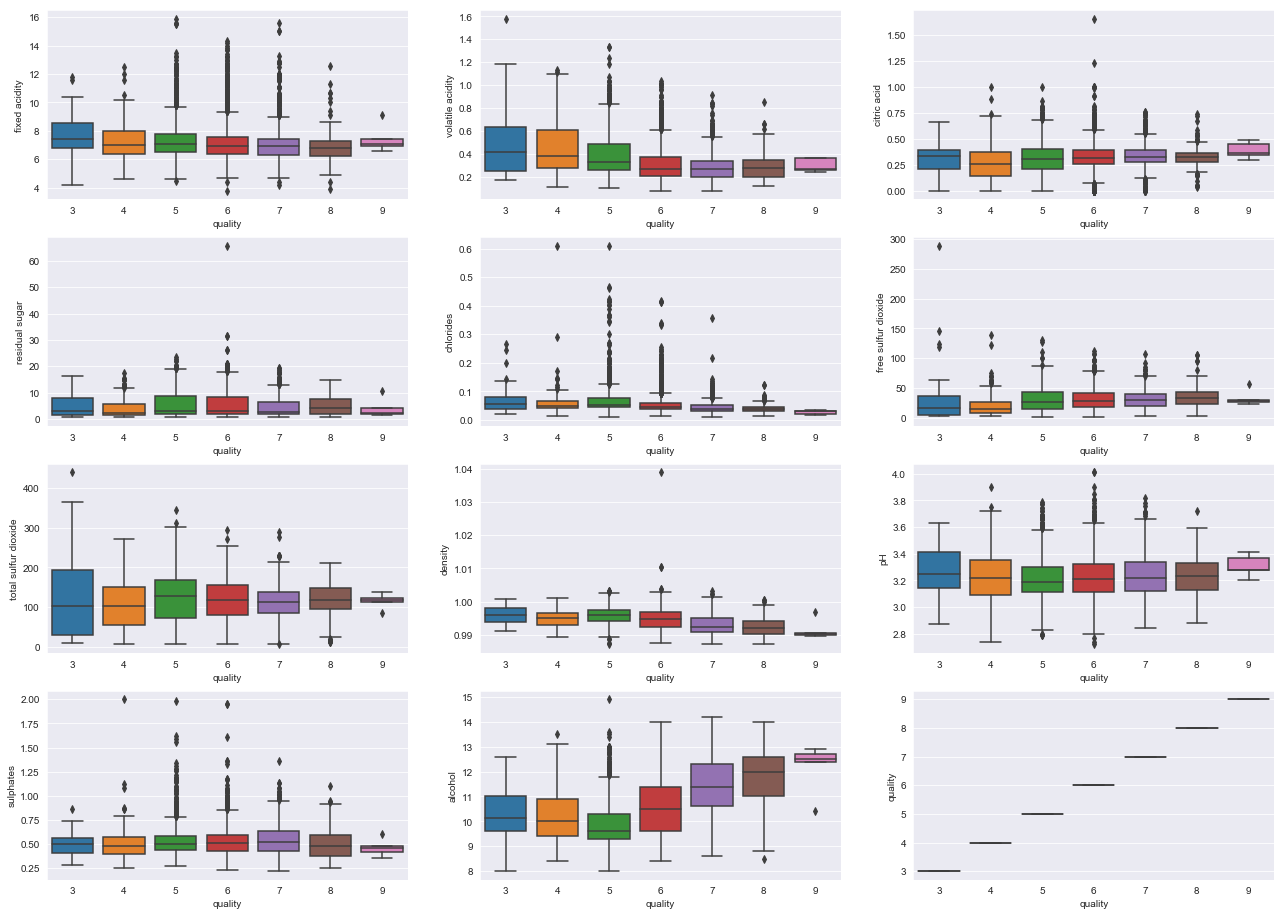

In [17]:
draw_multivarient_plot(wine,4,3,"box")

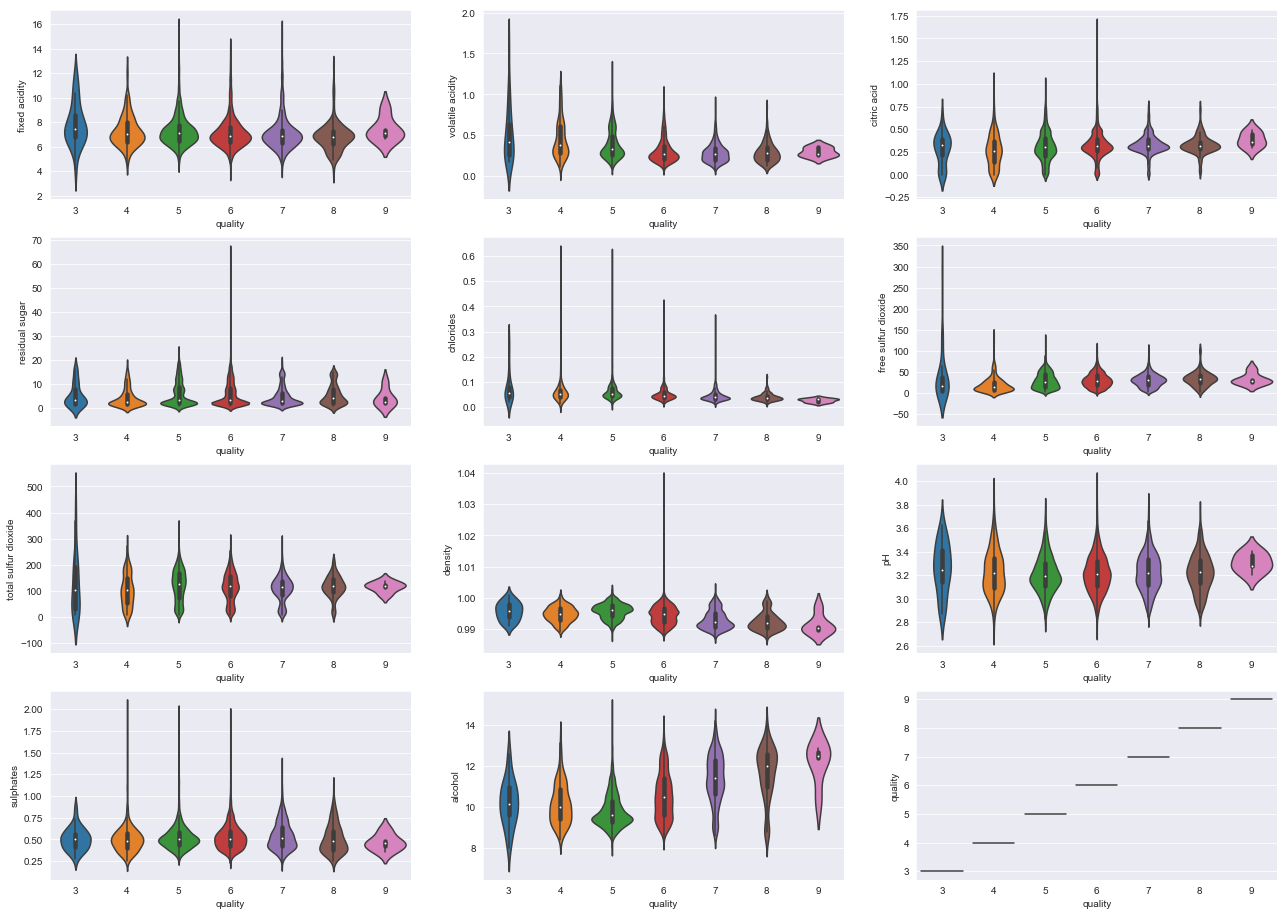

In [18]:
#Violin Plot türünde grafik çizdiriliyor
draw_multivarient_plot(wine,4,3,"violin")

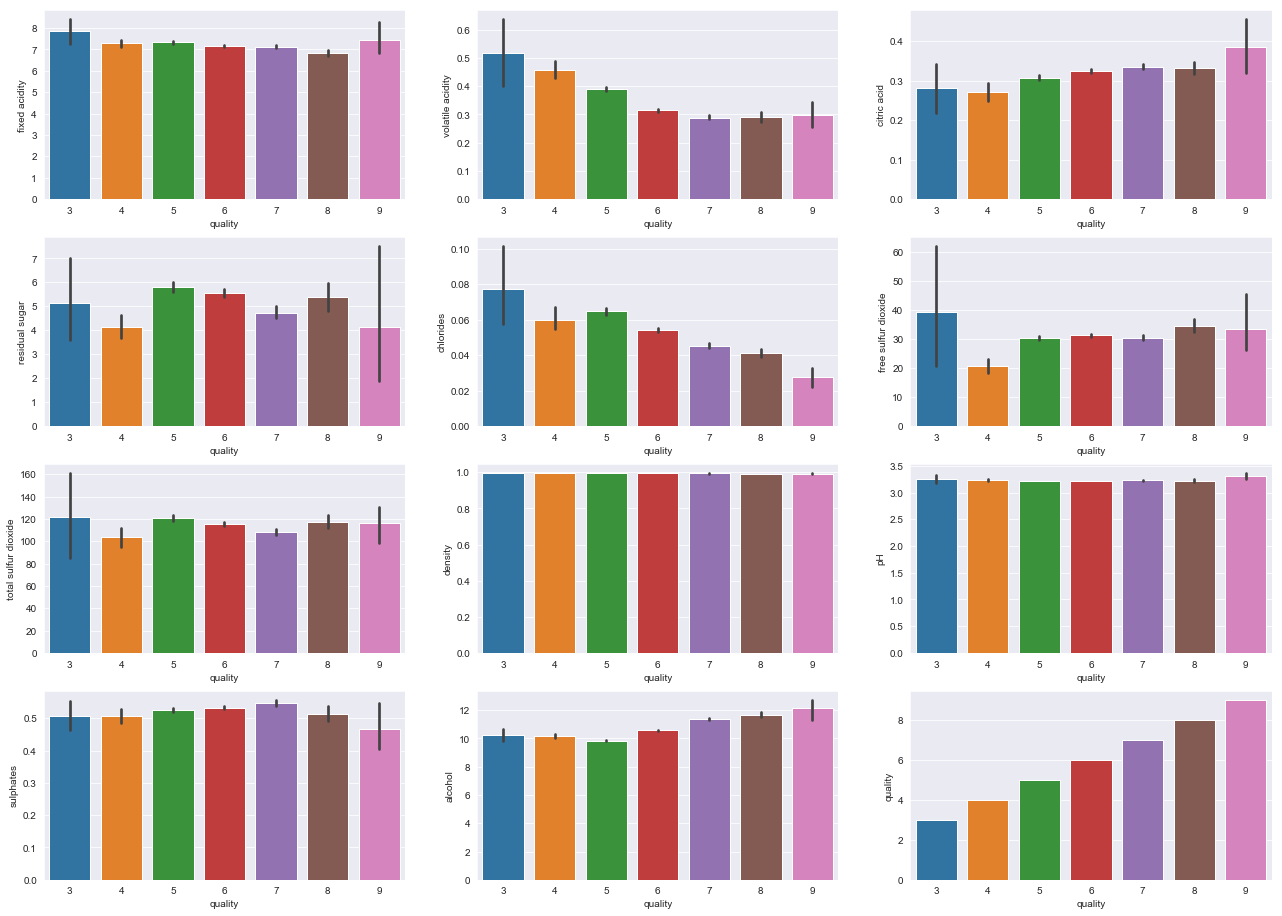

In [19]:
#Bar Plot türünde grafik çizdiriliyor
draw_multivarient_plot(wine,4,3,"bar")

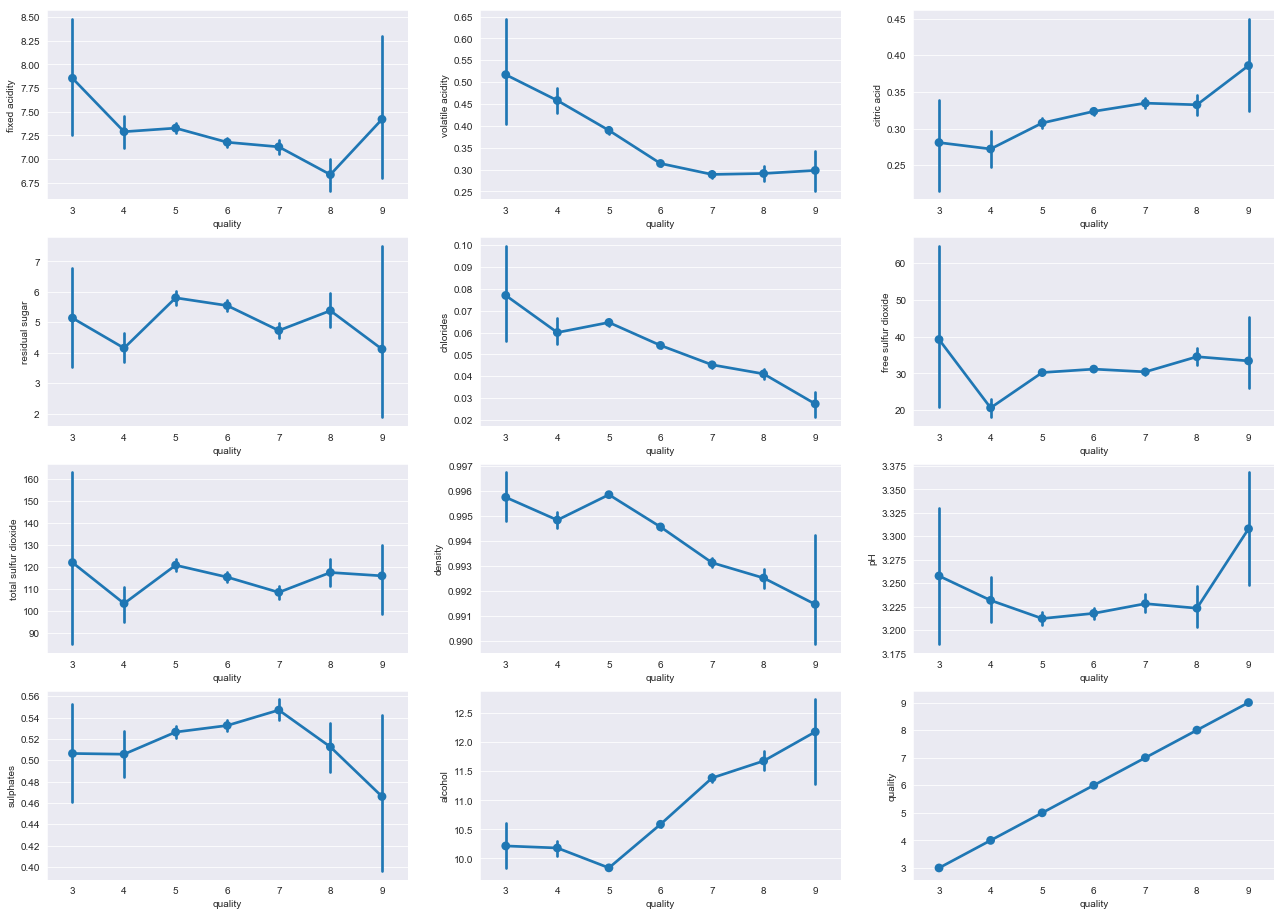

In [20]:
#Point Plot türünde grafik çizdiriliyor
draw_multivarient_plot(wine,4,3,"pointplot")

<Figure size 800x640 with 0 Axes>

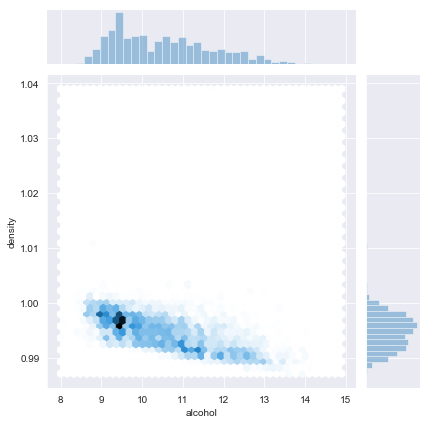

In [21]:
plt.figure(figsize=(10, 8), dpi= 80)
sns.jointplot(y=wine["density"],x=wine["alcohol"],kind="hex")

In [22]:
def get_models():
    models=[]
    models.append(("Logistic Regression",LogisticRegression()))
    models.append(("Gaussian NB",GaussianNB()))
    models.append(("KNN-Classification",KNeighborsClassifier()))
    models.append(("Decision Tree Classification",DecisionTreeClassifier()))
    models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
    
    return models

def cross_validation_scores_for_various_ml_models(X_cv, y_cv):
    print("Cross Validation Success Rates".upper())
    models=get_models()


    results=[]
    names= []

    for name, model in models:
        kfold=KFold(n_splits=5,shuffle=True,random_state=22)
        cv_result=cross_val_score(model,X_cv, y_cv, cv=kfold,scoring="accuracy")
        names.append(name)
        results.append(cv_result)
        print("{} model has been cross-validated, success rate:{:0.2f}".format(name, cv_result.mean()))

In [23]:
wine_temp=wine.copy(deep=True)
X=wine.drop('quality', axis=1)
y=wine['quality']
X=StandardScaler().fit_transform(X)
cross_validation_scores_for_various_ml_models(X, y)

CROSS VALIDATION SUCCESS RATES
Logistic Regression model has been cross-validated, success rate:0.54
Gaussian NB model has been cross-validated, success rate:0.45
KNN-Classification model has been cross-validated, success rate:0.56
Decision Tree Classification model has been cross-validated, success rate:0.61
Linear Discriminant Analysis model has been cross-validated, success rate:0.54


In [24]:
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

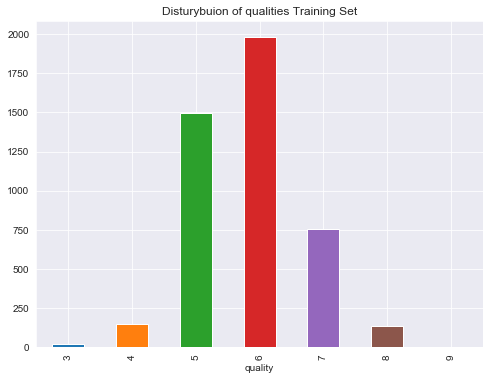

In [25]:
y_frame=pd.DataFrame()
y_frame['quality']=y_train
y_frame.groupby(['quality']).size().plot.bar(figsize=(8,6),title="Disturybuion of qualities Training Set")

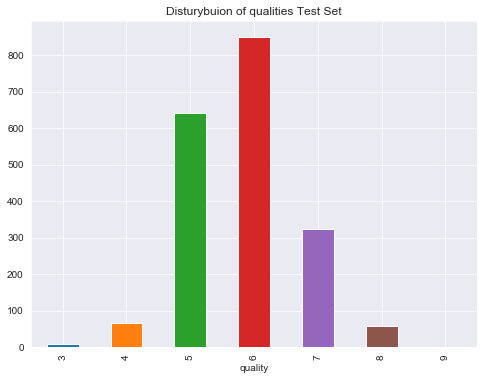

In [26]:
y_frame=pd.DataFrame()
y_frame['quality']=y_test
y_frame.groupby(['quality']).size().plot.bar(figsize=(8,6),title="Disturybuion of qualities Test Set")

In [27]:
def SVM_GridSearch(X_train, X_test, y_train, y_test):
    best_score=0
    gammas=[0.001, 0.01, 0.1, 1, 10, 100]
    Cs=[0.001, 0.01, 0.1, 1, 10, 100]
    
    for gamma in gammas:
        for C in Cs:
            svm=SVC(kernel='rbf',gamma=gamma, C=C)
            svm.fit(X_train, y_train)
            
            
            score=svm.score(X_test, y_test)
            
            if score>best_score:
                y_pred=svm.predict(X_test)
                best_score=score
                best_params={'C':C, 'gamma':gamma}
        
    print("best score:",best_score)
    print("best params:",best_params)
    print("classification reports:\n",classification_report(y_test, y_pred))

In [28]:
SVM_GridSearch(X_train, X_test, y_train, y_test)

best score: 0.6456410256410257
best params: {'C': 100, 'gamma': 1}
classification reports:
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         9
          4       0.52      0.17      0.26        65
          5       0.70      0.65      0.68       642
          6       0.62      0.73      0.67       851
          7       0.65      0.56      0.60       324
          8       0.62      0.41      0.49        58
          9       0.00      0.00      0.00         1

avg / total       0.64      0.65      0.64      1950



In [29]:
wine_temp.loc[(wine_temp['quality']==3),'quality']=1
wine_temp.loc[(wine_temp['quality']==4),'quality']=1

wine_temp.loc[(wine_temp['quality']==5),'quality']=2
wine_temp.loc[(wine_temp['quality']==6),'quality']=2

wine_temp.loc[(wine_temp['quality']==7),'quality']=3
wine_temp.loc[(wine_temp['quality']==8),'quality']=3
wine_temp.loc[(wine_temp['quality']==9),'quality']=3

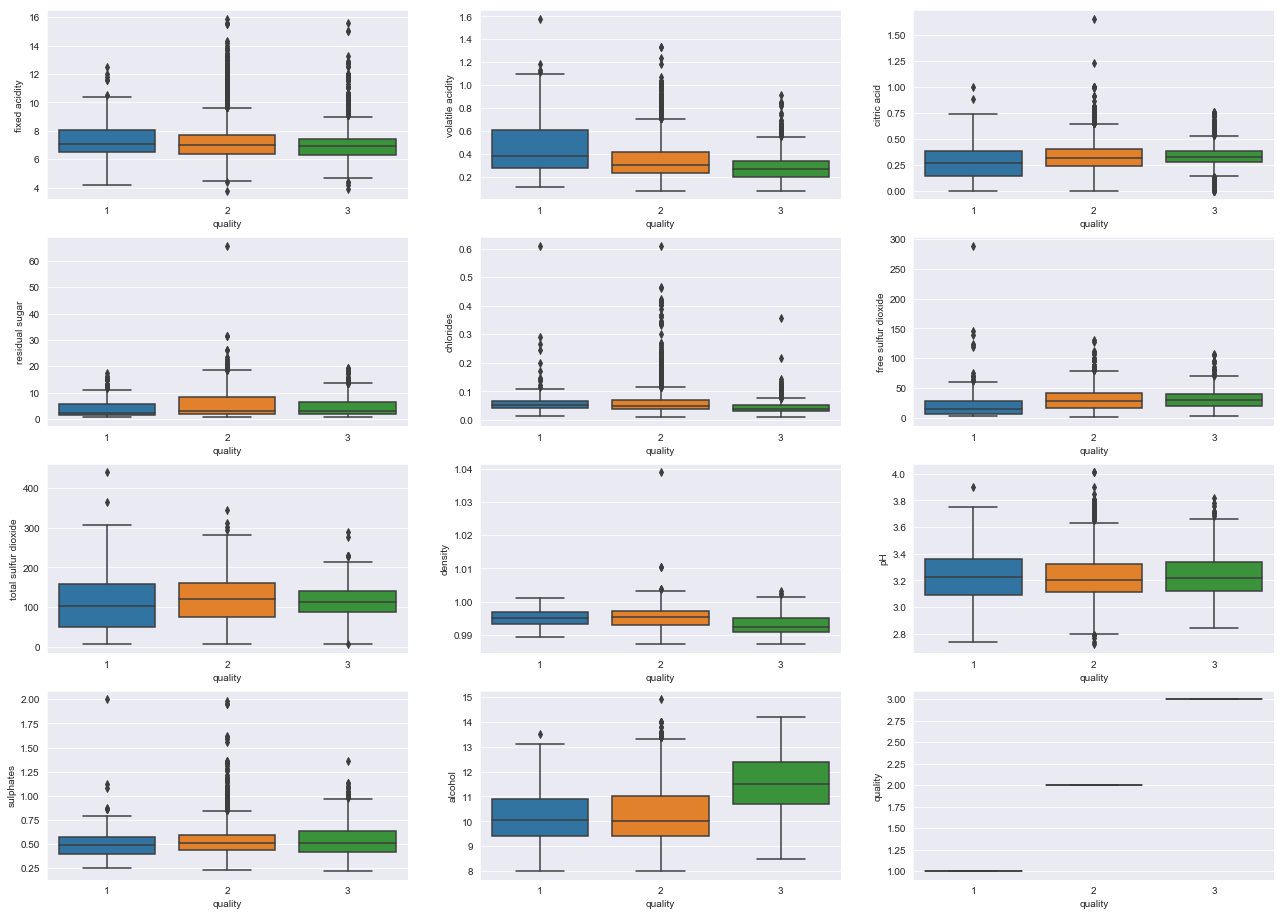

In [30]:
#Box Plot türünde grafik çizdiriliyor
draw_multivarient_plot(wine_temp,4,3,"box")

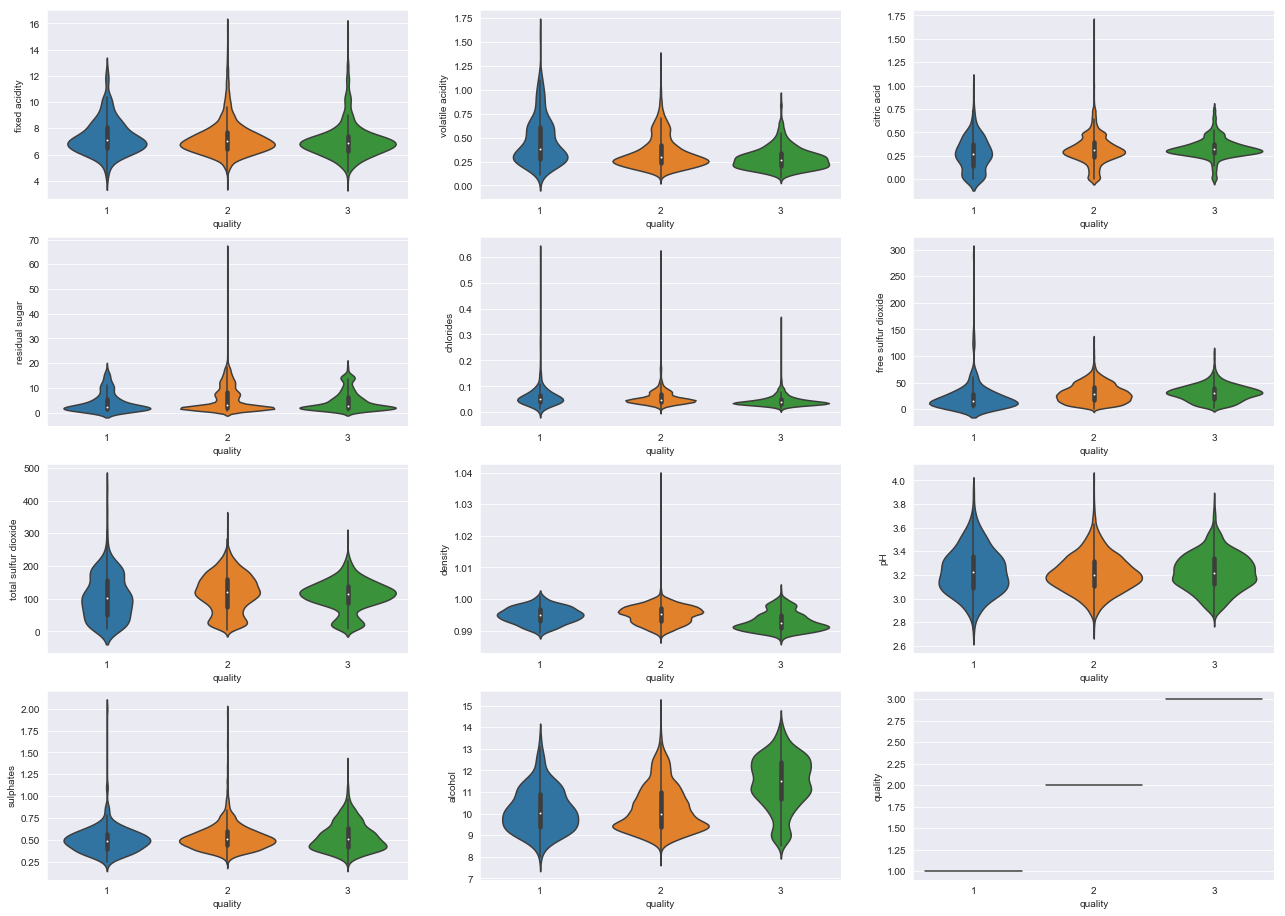

In [31]:
#Violin Plot türünde grafik çizdiriliyor
draw_multivarient_plot(wine_temp,4,3,"violin")

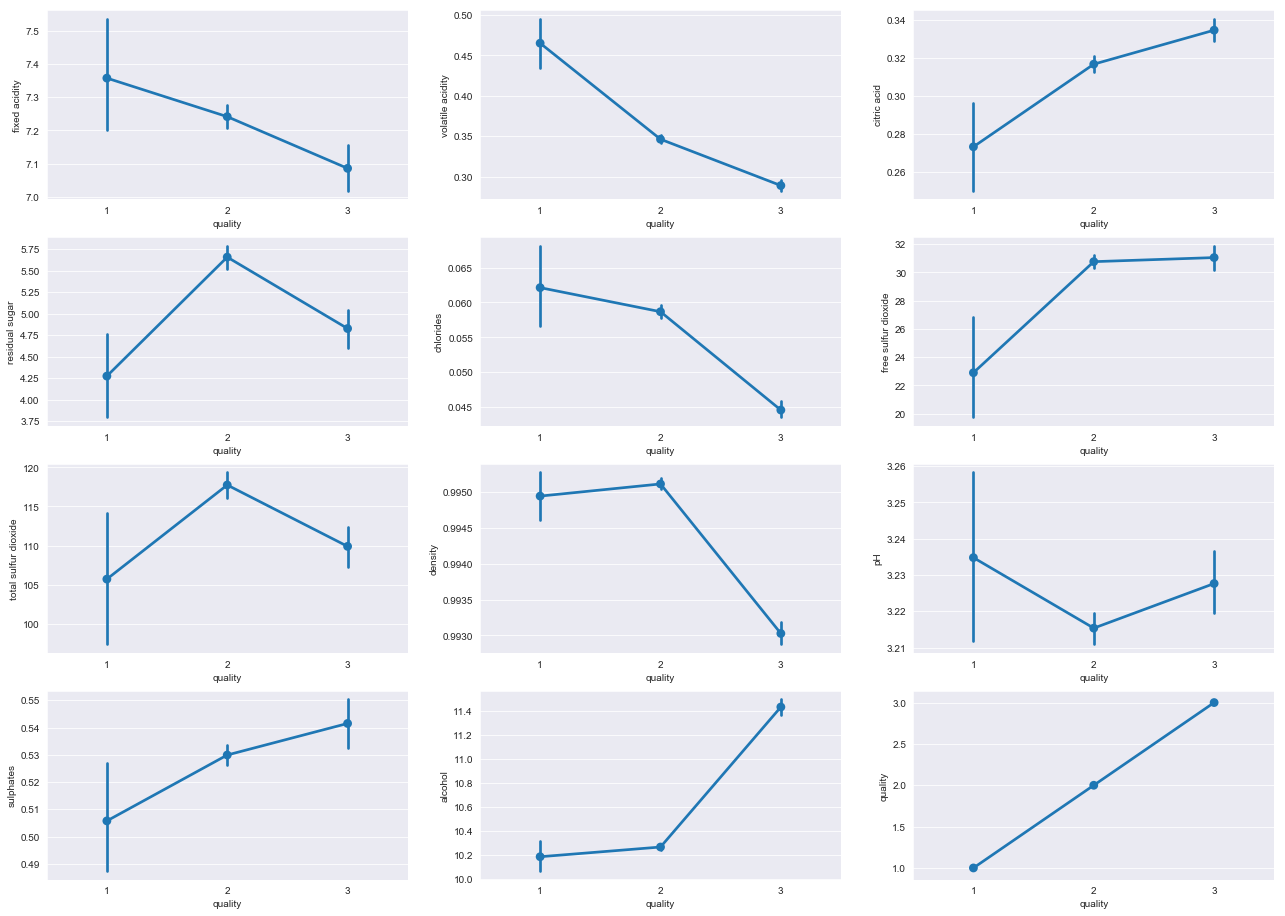

In [32]:
#Point Plot türünde grafik çizdiriliyor
draw_multivarient_plot(wine_temp,4,3,"point")

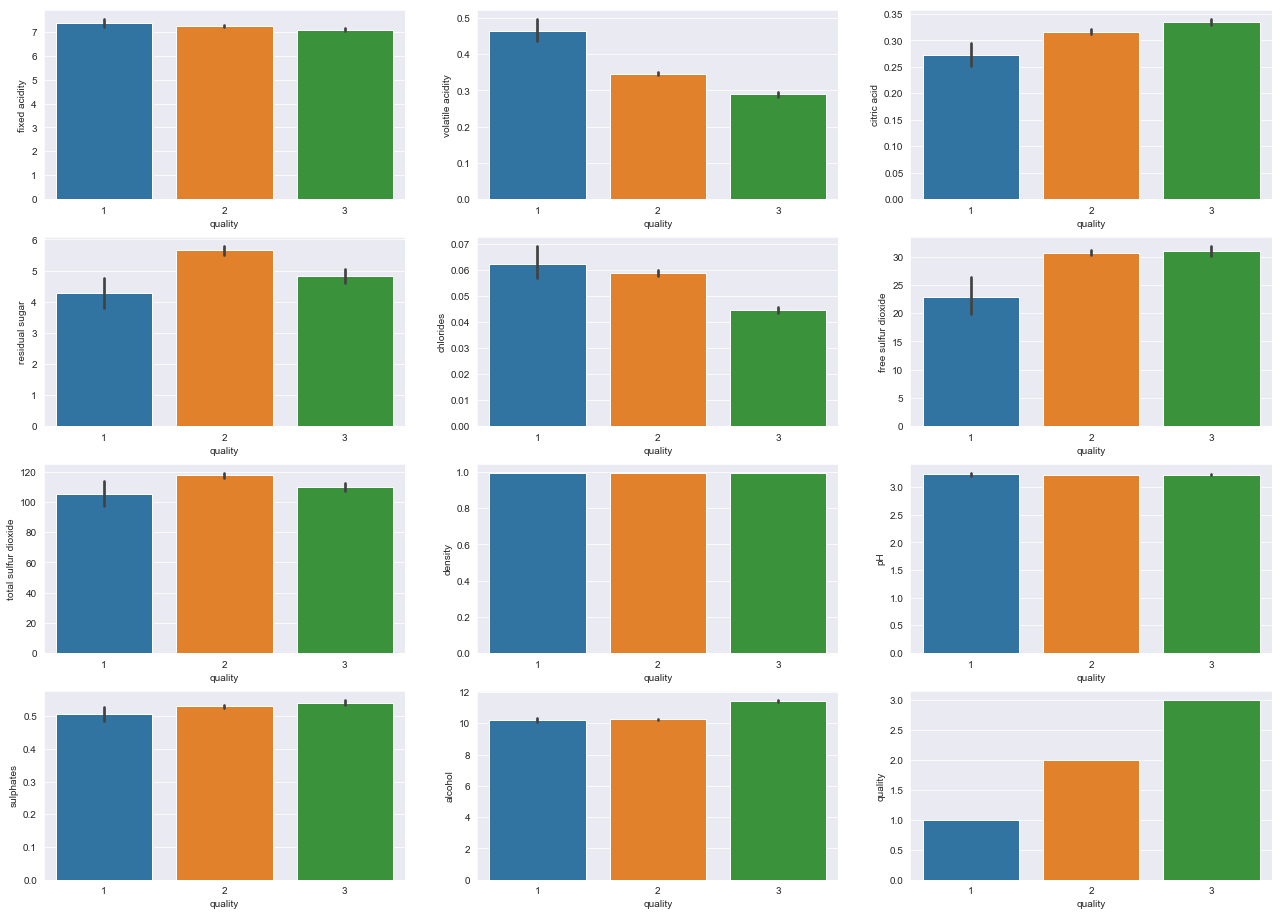

In [33]:
#Bar Plot türünde grafik çizdiriliyor
draw_multivarient_plot(wine_temp,4,3,"bar")

In [34]:
X_temp=wine_temp.drop('quality', axis=1)
y_temp=wine_temp['quality']
X_temp=StandardScaler().fit_transform(X_temp)

X_train_temp, X_test_temp, y_train_temp, y_test_temp=train_test_split(X_temp, y_temp,
                                                                      stratify=y_temp,test_size=0.3,
                                                                      random_state=42)


cross_validation_scores_for_various_ml_models(X_temp, y_temp)

CROSS VALIDATION SUCCESS RATES
Logistic Regression model has been cross-validated, success rate:0.78
Gaussian NB model has been cross-validated, success rate:0.69
KNN-Classification model has been cross-validated, success rate:0.80
Decision Tree Classification model has been cross-validated, success rate:0.79
Linear Discriminant Analysis model has been cross-validated, success rate:0.78


In [35]:
SVM_GridSearch(X_train_temp, X_test_temp, y_train_temp, y_test_temp)

best score: 0.8312820512820512
best params: {'C': 10, 'gamma': 10}
classification reports:
              precision    recall  f1-score   support

          1       1.00      0.09      0.17        74
          2       0.82      1.00      0.90      1493
          3       0.99      0.32      0.48       383

avg / total       0.86      0.83      0.79      1950



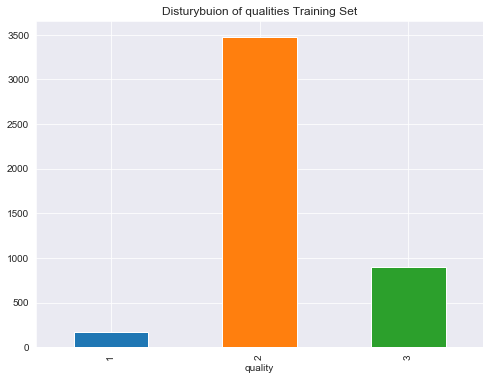

In [36]:
y_frame=pd.DataFrame()
y_frame['quality']=y_train_temp
y_frame.groupby(['quality']).size().plot.bar(figsize=(8,6),title="Disturybuion of qualities Training Set")

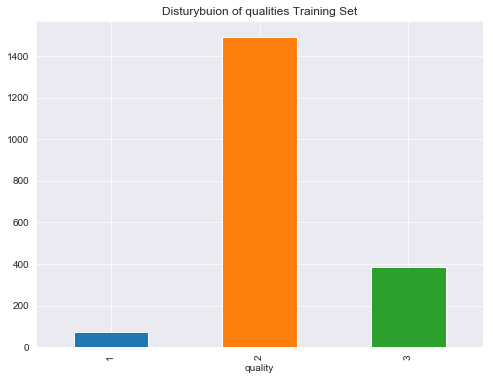

In [37]:
y_frame=pd.DataFrame()
y_frame['quality']=y_test_temp
y_frame.groupby(['quality']).size().plot.bar(figsize=(8,6),title="Disturybuion of qualities Training Set")

In [38]:
xModel = winecat.iloc[:, 0:-2].values
yModel = winecat.iloc[:, -1].values

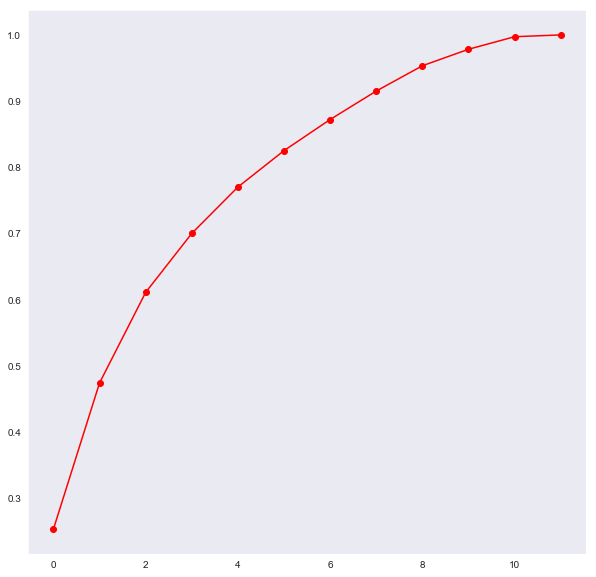

In [39]:
sc_x=StandardScaler()
xModel = sc_x.fit_transform(xModel)

pca=PCA()
x_pca = pca.fit_transform(xModel)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [40]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(xModel)

In [41]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 1)

In [42]:
def classifier(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score=accuracy_score(y_pred,y_test)
    return score*100

In [43]:
print('KNN: '+ str(classifier(KNeighborsClassifier(n_neighbors=100))))

KNN: 82.6923076923077


In [44]:
print('Gaussian DB:'+str(classifier(GaussianNB())))


Gaussian DB:78.23076923076923


In [45]:
print('Random Forrest:'+str(classifier(RandomForestClassifier(n_estimators=100))))

Random Forrest:91.07692307692308


In [46]:
print('Logistic Regression:'+str(classifier(LogisticRegression())))

Logistic Regression:84.92307692307692


In [47]:
wineTree=winecat.copy()
del wineTree['category']

dfp=pd.DataFrame(wineTree, columns=wineTree.columns)
y=wineTree.quality

In [48]:
dtree=DecisionTreeClassifier()
dtree.fit(dfp,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

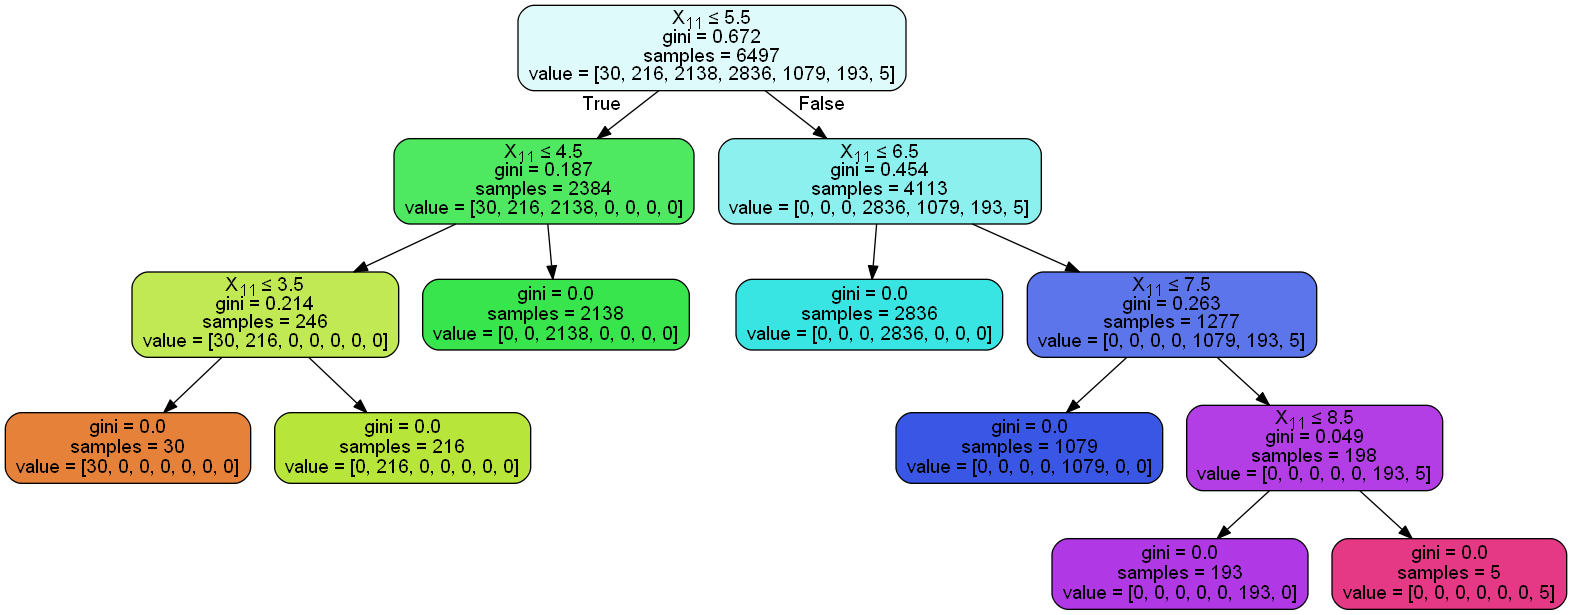

In [49]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [130]:
wine_temp.loc[(wine_temp['quality']==3),'quality']=1
wine_temp.loc[(wine_temp['quality']==4),'quality']=1

wine_temp.loc[(wine_temp['quality']==5),'quality']=1
wine_temp.loc[(wine_temp['quality']==6),'quality']=1

wine_temp.loc[(wine_temp['quality']==7),'quality']=3
wine_temp.loc[(wine_temp['quality']==8),'quality']=3
wine_temp.loc[(wine_temp['quality']==9),'quality']=3

In [131]:
import pylab as pl
from sklearn import neighbors, datasets
X_KN = wine_temp.loc[:, 'pH':'alcohol'].copy() # we only take the first two features. 
del X_KN['sulphates']
Y_KN = wine_temp.quality.copy()

In [132]:
h = .02

In [133]:

knn=KNeighborsClassifier(n_neighbors=300)

In [134]:
knn.fit(X_KN, Y_KN)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=300, p=2,
           weights='uniform')

In [135]:
x_min, x_max = X_KN.iloc[:,0].min() - .5, X_KN.iloc[:,0].max() + .5
y_min, y_max = X_KN.iloc[:,1].min() - .5, X_KN.iloc[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

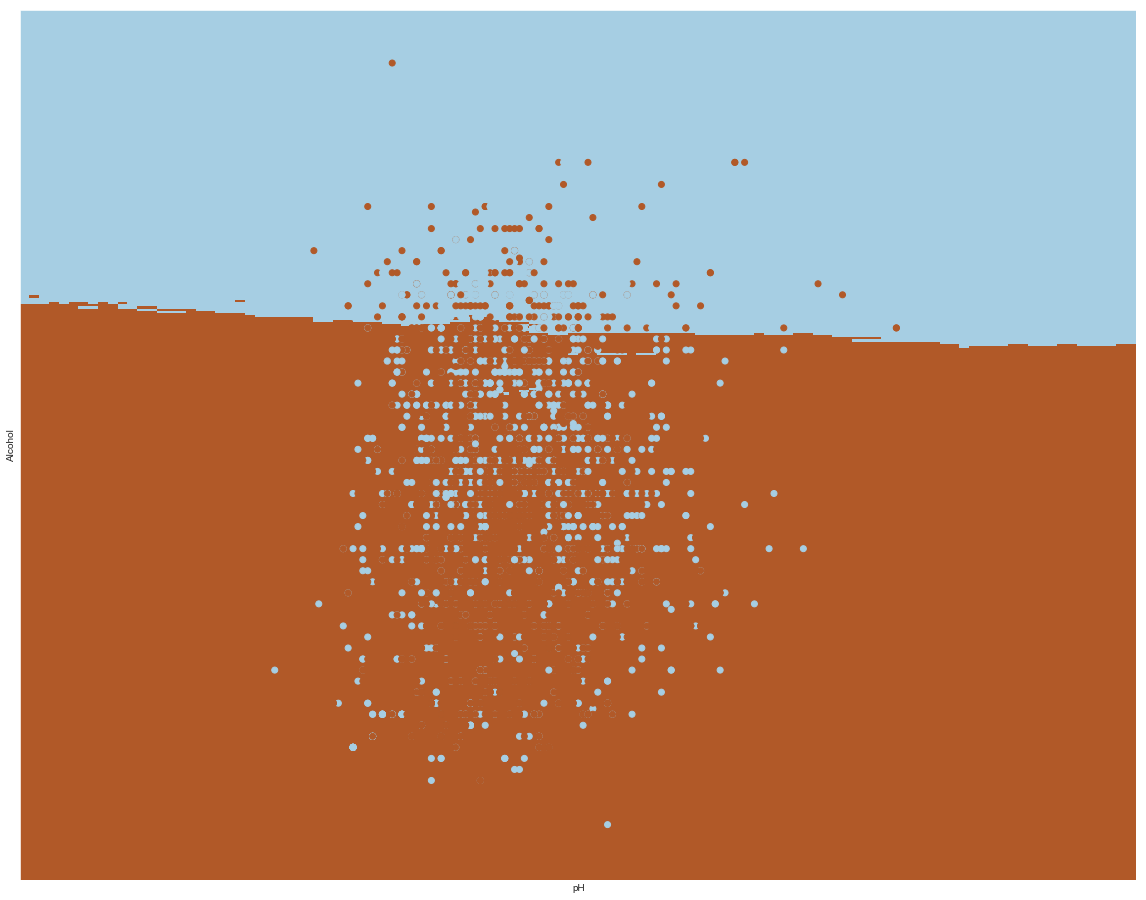

In [136]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(20, 16))
pl.set_cmap(pl.cm.Paired)
pl.pcolormesh(xx, yy, Z)

# Plot also the training points
pl.scatter(X_KN.iloc[:,0], X_KN.iloc[:,1],c=Y_KN )
pl.xlabel('pH')
pl.ylabel('Alcohol')

pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.xticks(())
pl.yticks(())

pl.show()